In [49]:
# -*- coding: utf-8 -*-
"""
Created on Fri May  8 15:20:09 2020

@author: Manik Bali
"""

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

      

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(r"C:\Users\Manik Bali\Downloads\lahman2014.sqlite")

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pd.read_sql(salary_query, conn)
team_salaries.head()

payrol_query =  "with total_payroll as (SELECT teamID, yearID, sum(salary) as payroll FROM Salaries GROUP BY teamID, yearID) SELECT Teams.teamID, Teams.yearID, Teams.lgID, payroll, franchID, rank, W,G, ((W*1.0/G)*100) as win_percentage FROM total_payroll, Teams WHERE total_payroll.yearID = Teams.yearID and total_payroll.teamID = Teams.teamID"
df=pd.read_sql(payrol_query,conn)
df.head(10)

#output of the SQL Query

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage
0,ATL,1985,NL,14807000.0,ATL,5,66,162,40.740741
1,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795
2,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252
3,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556
4,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239
5,CHN,1985,NL,12702917.0,CHC,4,77,162,47.530864
6,CIN,1985,NL,8359917.0,CIN,2,89,162,54.938272
7,CLE,1985,AL,6551666.0,CLE,7,60,162,37.037037
8,DET,1985,AL,10348143.0,DET,3,84,161,52.173913
9,HOU,1985,NL,9993051.0,HOU,3,83,162,51.234568


In [59]:
#Part 3: Data transformations
#-----------------------------------------------------------------------------
#Calculate standardized payroll, expected win percent and Efficiency for each row and add the three columns to the data frame
#These are used for solving : 
avg_payrollj=df.groupby('yearID')['payroll'].mean()
std_payrollj=df.groupby('yearID')['payroll'].std()

payroll_list = []
#Calculate Standardized payroll
for iyear in  range(df['yearID'].min(), df['yearID'].max()+1):
    temp=(df.loc[(df['yearID'] == iyear)]['payroll'] - avg_payrollj[iyear] )/std_payrollj[iyear]  
    payroll_list.append(temp)
standarized_payroll = pd.concat(payroll_list)
standarized_payroll.name='standardized_payroll'
#Adding Columns to the dataframe
df['standardized_payroll'] = pd.Series(standarized_payroll, index=df.index)

#Problem 7 

df['expected_win_pct'] = pd.Series(50+2.5*df['standardized_payroll'],name='expected_win_pct',index=df.index)

#Problem 8
df['efficiency'] =  pd.Series(df['win_percentage']- df['expected_win_pct'] ,name='efficiency', index=df.index)  

#------------------------------------------------------------------------------


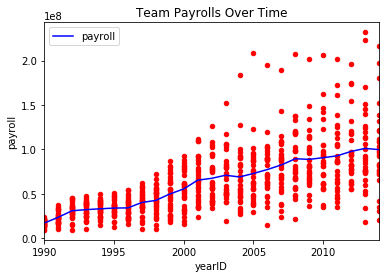

<Figure size 432x288 with 0 Axes>

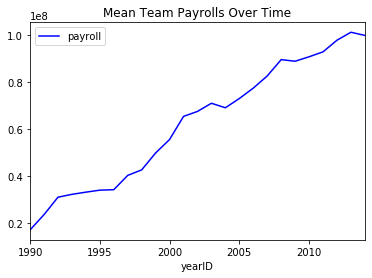

In [32]:
#Part 2: Exploratory Data Analysis
#make a new dataframe that has data between 1990-2014
StartYear=1990
EndYear= 2014
df1=df.loc[(df['yearID'] >= StartYear) & (df['yearID'] <= EndYear)]
#df1['standardized_payroll'] = pd.Series(standarized_payroll, index=df1.index)



#fig=plt.figure()
p1=df1.plot(kind='scatter',x='yearID',y='payroll', color='red',title='Team Payrolls Over Time')
df_t = df1.groupby('yearID').mean()
a1=df_t.plot(kind='line',y='payroll', color='blue',ax=p1)

fig1=plt.figure()
df_t.plot(kind='line',y='payroll', color='blue',title='Mean Team Payrolls Over Time')
plt.show()

#fig = plt.figure()
#plt.title('Team Payrolls Over Time for Teams',pad=20,fontsize=20)
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

,teamID,yearID,year_range
0,ATL,1985,0
1,BAL,1985,0
2,BOS,1985,0
3,CAL,1985,0
4,CHA,1985,0
5,CHN,1985,0
6,CIN,1985,0
7,CLE,1985,0
8,DET,1985,0
9,HOU,1985,0


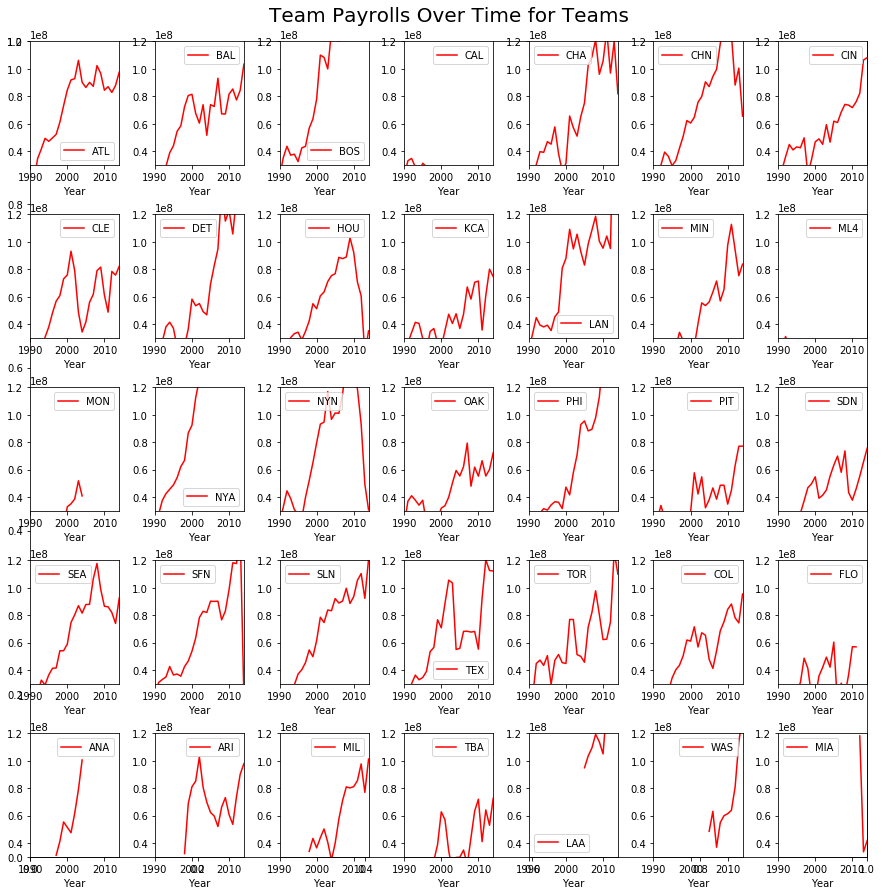

In [37]:
#Part 2: Exploratory Data Analysis
#Correlation between payroll and winning percentage
#Problem 4
fig = plt.figure()
plt.title('Team Payrolls Over Time for Teams',pad=20,fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 36):
    
    axes= fig.add_subplot(5, 7, i)
  # add every single subplot to the figure with a for loop
    teamid=df['teamID'].unique()[i-1]
   

    df2=df1.loc[(df['teamID'] == teamid) ]
    
    a=df2.plot(kind='line',x='yearID',y='payroll', figsize=(15,15), xlim=(1990,2014), ylim=(30000000.0,120000000.0), color='red',label=teamid,ax=axes)
    x_axis = a.axes.get_xaxis()
    x_axis.set_label_text('Year')

year_range=pd.cut(df['yearID'], bins=5,labels=False)
year_range.name='year_range'
frames=[df,year_range] 
payroll_tab_bins=pd.concat(frames,axis=1)
payroll_tab_bins[ ['teamID',  'yearID','year_range']]

Text(0.5, 1.0, 'Interval=(2008.2, 2014.0]')

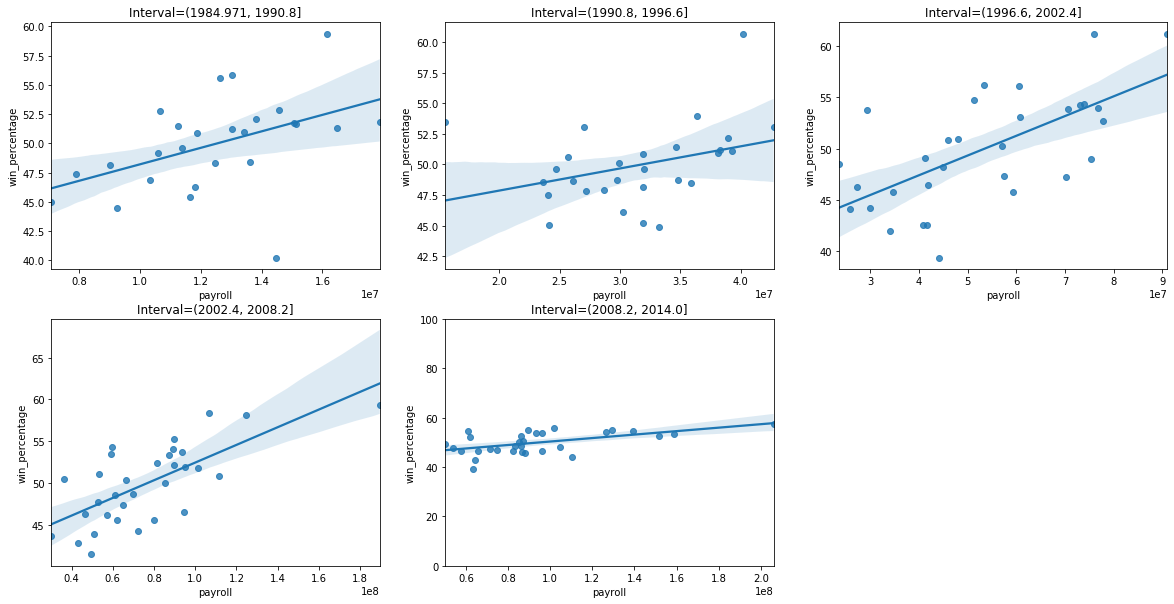

In [43]:


fig = plt.figure(figsize=(20,10))
ax1= fig.add_subplot(2, 3, 1)
ax2= fig.add_subplot(2, 3, 2)
ax3= fig.add_subplot(2, 3, 3)
ax4= fig.add_subplot(2, 3, 4)
ax5= fig.add_subplot(2, 3, 5)

x_oak=np.array(range(5))
y_oak=np.array(range(5))
annotates=['(1984.971, 1990.8]', '(1990.8, 1996.6]','(1996.6, 2002.4]','(2002.4, 2008.2]','(2008.2, 2014.0]']

y=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 0 )].groupby('teamID').mean()['win_percentage']
y1=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 0 )].groupby('teamID').mean()['standardized_payroll']
x1=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 0 )].groupby('teamID').mean()['payroll']
x=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 0 )].groupby('teamID').mean()['payroll']
x_oak[0]= x['teamID' == 'OAK']
y_oak[0]= y['teamID' == 'OAK']
plt.ylim(0, 100)
sns.regplot(x,y,ax=ax1).set_title('Interval=(1984.971, 1990.8]')



y=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 1 )].groupby('teamID').mean()['win_percentage']
y2=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 1 )].groupby('teamID').mean()['standardized_payroll']
x2=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 1 )].groupby('teamID').mean()['payroll']
x=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 1 )].groupby('teamID').mean()['payroll']
x_oak[1]= x['teamID' == 'OAK']
y_oak[1]= y['teamID' == 'OAK']

sns.regplot(x,y,ax=ax2).set_title('Interval=(1990.8, 1996.6]')
y=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 2 )].groupby('teamID').mean()['win_percentage']
y3=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 2 )].groupby('teamID').mean()['standardized_payroll']

x3=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 2 )].groupby('teamID').mean()['payroll']
x=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 2 )].groupby('teamID').mean()['payroll']
x_oak[2]= x['teamID' == 'OAK']
y_oak[2]= y['teamID' == 'OAK']

sns.regplot(x,y,ax=ax3).set_title('Interval=(1996.6, 2002.4]')
#plt.ylim(0, 100)

y=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 3 )].groupby('teamID').mean()['win_percentage']
y4=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 3 )].groupby('teamID').mean()['standardized_payroll']
x4=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 3 )].groupby('teamID').mean()['payroll']
x=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 3 )].groupby('teamID').mean()['payroll']
x_oak[3]= x['teamID' == 'OAK']
y_oak[3]= y['teamID' == 'OAK']

sns.regplot(x,y,ax=ax4).set_title('Interval=(2002.4, 2008.2]')
y5=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 4 )].groupby('teamID').mean()['standardized_payroll']   
x5=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 4 )].groupby('teamID').mean()['payroll'] 
y=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 4 )].groupby('teamID').mean()['win_percentage']
x=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 4 )].groupby('teamID').mean()['payroll']
x_oak[4]= x['teamID' == 'OAK']
y_oak[4]= y['teamID' == 'OAK']

sns.regplot(x,y,ax=ax5).set_title('Interval=(2008.2, 2014.0]')

In [50]:
print("As we can see from these scatter plots, it appears that on average, the spread of the average payroll increases as more teams are paying their players more and more as time goes on. Also, we see that our regression line goes from being vertical to diagonal over time, signaling that spending more money on players is more likely to result in a team winning more games. Apart from the period of 1991 to 1997, it seems that NYA have always seem to have, on average, the highest payroll and that has worked out quiet nicely for them as they are able to keep the highest winning percentage, perhaps because of that.")

As we can see from these scatter plots, it appears that on average, the spread of the average payroll increases as more teams are paying their players more and more as time goes on. Also, we see that our regression line goes from being vertical to diagonal over time, signaling that spending more money on players is more likely to result in a team winning more games. Apart from the period of 1991 to 1997, it seems that NYA have always seem to have, on average, the highest payroll and that has worked out quiet nicely for them as they are able to keep the highest winning percentage, perhaps because of that.


In [54]:
print("As you can see from the plots, the Oakland A’s started off like any other team from 1985 until 1997. In 1997 to 2002, the Oakland A’s were doing significantly better than their counterparts who were spending the same amount of money as them i.e. they were winning more for less payroll. This trend continued until 2014, but as teams keep spending more money, they can not be as high, relatively to others due to the strong effect of money in winning although they are still high in average winning compaared to any team that spent as little as they did")
      

As you can see from the plots, the Oakland A’s started off like any other team from 1985 until 1997. In 1997 to 2002, the Oakland A’s were doing significantly better than their counterparts who were spending the same amount of money as them i.e. they were winning more for less payroll. This trend continued until 2014, but as teams keep spending more money, they can not be as high, relatively to others due to the strong effect of money in winning although they are still high in average winning compaared to any team that spent as little as they did


Text(0.5, 1, 'Interval=(2002.4, 2008.2]')

Text(0.5, 1, 'Interval=(2008.2, 2014.0]')

Text(74878666, 46, '(2008.2, 2014.0]')

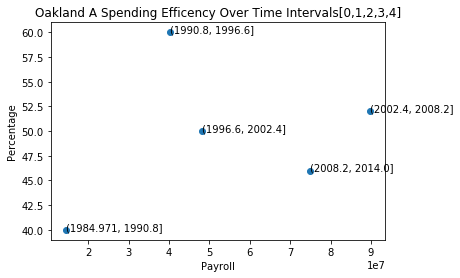

In [44]:
plt.figure()
plt.scatter(x_oak,y_oak)
plt.title("Oakland A Spending Efficency Over Time Intervals[0,1,2,3,4]")
plt.xlabel("Payroll")
plt.ylabel("Percentage")
plt.annotate(annotates[0],(x_oak[0],y_oak[0]))
plt.annotate(annotates[1],(x_oak[1],y_oak[1]))
plt.annotate(annotates[2],(x_oak[2],y_oak[2]))
plt.annotate(annotates[3],(x_oak[3],y_oak[3]))
plt.annotate(annotates[4],(x_oak[4],y_oak[4]))

Text(0.5, 1.0, 'Interval=(2008.2, 2014.0]')

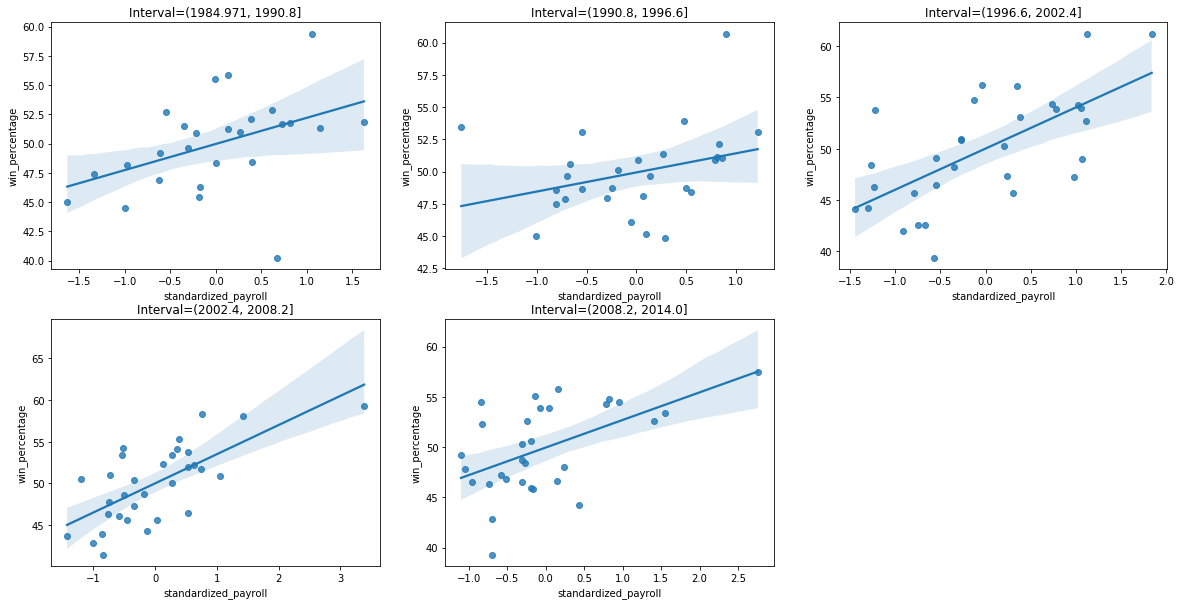

In [47]:
#Part 3: Data transformations
#Problem 6 ( Problem 5 has been discussed earlier)
fig=plt.figure(figsize=(20,10))  
ax11= fig.add_subplot(2, 3, 1)
ax12= fig.add_subplot(2, 3, 2)
ax13= fig.add_subplot(2, 3, 3)
ax14= fig.add_subplot(2, 3, 4)
ax15= fig.add_subplot(2, 3, 5)
y11=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 0 )].groupby('teamID').mean()['win_percentage']
y12=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 1 )].groupby('teamID').mean()['win_percentage']
y13=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 2 )].groupby('teamID').mean()['win_percentage']
y14=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 3 )].groupby('teamID').mean()['win_percentage']
y15=payroll_tab_bins.loc[(payroll_tab_bins['year_range'] == 4 )].groupby('teamID').mean()['win_percentage']

sns.regplot(y1,y11,ax=ax11).set_title('Interval=(1984.971, 1990.8]')
sns.regplot(y2,y12,ax=ax12).set_title('Interval=(1990.8, 1996.6]')
sns.regplot(y3,y13,ax=ax13).set_title('Interval=(1996.6, 2002.4]')
sns.regplot(y4,y14,ax=ax14).set_title('Interval=(2002.4, 2008.2]')
sns.regplot(y5,y15,ax=ax15).set_title('Interval=(2008.2, 2014.0]')

In [56]:
print("Question 3: These new plot represents the transformation because we can now see how each data point is relative to each other on a standard scale. We normalized the points according to their payroll so that the mean payroll is now centered at 0 and the standard deviation is now 1. This way we can see that if a data point (team in a specific time period) is above zero payroll (i.e. above average), it will result in Y winning percentage. In the plots from problem 4, all of the teams (plots in year ranges) had a different center (mean payroll) and standard deviation, which made it difficult to compare the plots of different time periods. Having this standardized transformation makes it easy to compare the points because they are all on the same normal scale.")


Question 3: These new plot represents the transformation because we can now see how each data point is relative to each other on a standard scale. We normalized the points according to their payroll so that the mean payroll is now centered at 0 and the standard deviation is now 1. This way we can see that if a data point (team in a specific time period) is above zero payroll (i.e. above average), it will result in Y winning percentage. In the plots from problem 4, all of the teams (plots in year ranges) had a different center (mean payroll) and standard deviation, which made it difficult to compare the plots of different time periods. Having this standardized transformation makes it easy to compare the points because they are all on the same normal scale.


As you can see, when we plot all of these teams and look at the regression line for the average payroll (mu = 0), we see that if a team where to spend the average amount of payroll relative to the other teams in the league, they would likely (on average) win about 50% of their games


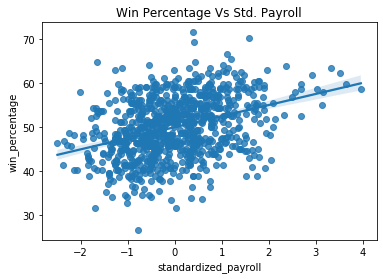

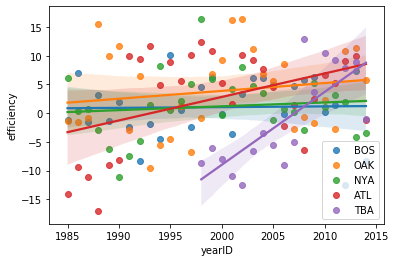

In [68]:
#Expected wins
#Problem 7
fig=plt.figure()
sns.regplot(df['standardized_payroll'],df['win_percentage'] ).set_title('Win Percentage Vs Std. Payroll')

fig=plt.figure()
yr1, e1 = df.loc[(df['teamID'] == 'BOS')]['yearID'], df.loc[(df['teamID'] == 'BOS')]['efficiency']
yr2, e2=  df.loc[(df['teamID'] == 'OAK')]['yearID'],  df.loc[(df['teamID'] == 'OAK')]['efficiency']
yr3,e3=   df.loc[(df['teamID'] == 'NYA')]['yearID'], df.loc[(df['teamID'] == 'NYA')]['efficiency']
yr4, e4= df.loc[(df['teamID'] == 'ATL')]['yearID'], df.loc[(df['teamID'] == 'ATL')]['efficiency']
yr5,e5= df.loc[(df['teamID'] == 'TBA')]['yearID'] ,df.loc[(df['teamID'] == 'TBA')]['efficiency']

sns.regplot(yr1,e1,label='BOS').legend(loc="best")
sns.regplot(yr2,e2,label='OAK').legend(loc="best")
sns.regplot(yr3,e3,label='NYA').legend(loc="best")
sns.regplot(yr4,e4,label='ATL').legend(loc="best")
sns.regplot(yr5,e5,label='TBA').legend(loc="best")
print("As you can see, when we plot all of these teams and look at the regression line for the average payroll (mu = 0), we see that if a team where to spend the average amount of payroll relative to the other teams in the league, they would likely (on average) win about 50% of their games")

In [67]:
print("Questiom 4 If a team is winning more games that what is expected (expectation is based off of data on all teams and off all years), then we say that that team is particularly efficient at winning. This is because they win more than what we would think they would. We plot this data in the first graph above to see the average efficiency of 5 teams OAK, BOS, NYA, ATL, and TBA. We see that after 1990, these teams were always efficient")

Questiom 4 If a team is winning more games that what is expected (expectation is based off of data on all teams and off all years), then we say that that team is particularly efficient at winning. This is because they win more than what we would think they would. We plot this data in the first graph above to see the average efficiency of 5 teams OAK, BOS, NYA, ATL, and TBA. We see that after 1990, these teams were always efficient
